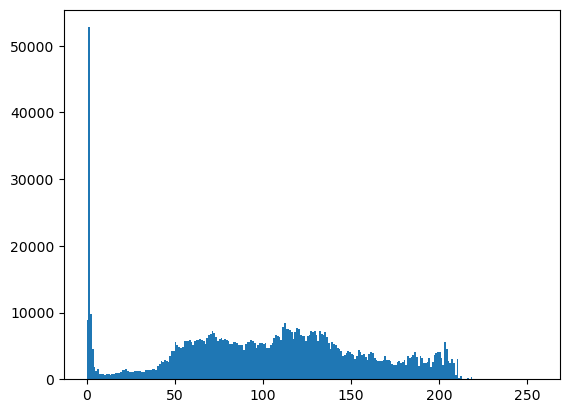

In [40]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

%matplotlib inline

# Charger l'image à partir du fichier "COVID-13.png"
image = cv2.imread("COVID-13.png")

# Tracer l'histogramme de l'image
plt.hist(image.ravel(), 256, [0, 256])  # Créer un histogramme avec 256 bins
plt.show()  # Afficher l'histogramme


<Figure size 1000x1000 with 0 Axes>

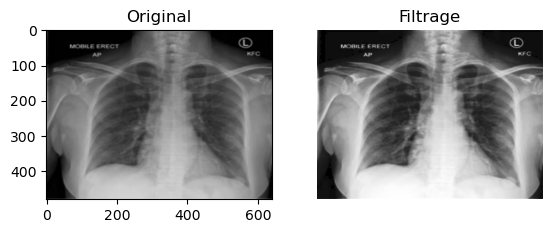

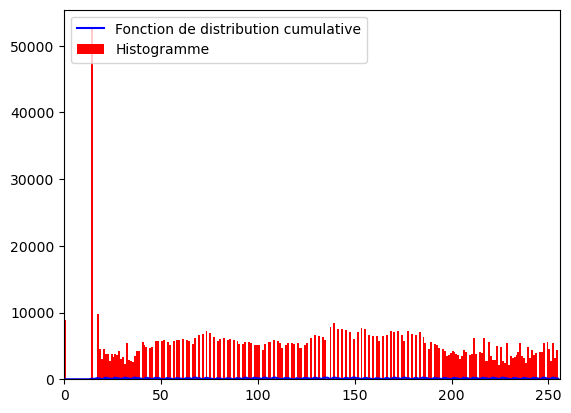

In [41]:
import os
import matplotlib.pyplot as plt
import cv2
from pprint import pprint as pp

%matplotlib inline

# Charger l'image à partir du fichier "COVID-13.png"
image = cv2.imread("COVID-13.png")
# plt.imshow(image)

# Calculer l'histogramme de l'image avec 256 bins entre 0 et 256
hist, bins = np.histogram(image.flatten(), 256, [0, 256])

# Fonction pour l'égalisation de l'histogramme
def eq_hist(hist):
    # Calculer la fonction de distribution cumulative
    cdf = hist.cumsum()

    # Créer un masque pour les valeurs non marquées (distinctes de 0)
    cdf_m = np.ma.masked_equal(cdf, 0)
    
    # Normaliser la fonction de distribution cumulative pour obtenir des valeurs entre 0 et 255
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    # Transformer en entiers (uniquement la partie entière est conservée)
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    
    return cdf

# Égaliser l'histogramme de l'image
cdf = eq_hist(hist)
img2 = cdf[image]

# Calculer le nouvel histogramme de l'image égalisée
hist2, bins2 = np.histogram(img2.flatten(), 256, [0, 256])

# Égaliser le nouvel histogramme de l'image
cdf2 = eq_hist(hist2)
img3 = cdf2[img2]
cdf_normalized = cdf2 * hist2.max() / cdf2.max()

# Afficher les résultats
plt.figure(figsize=(10, 10))

plt.figure()
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Filtrage")
plt.imshow(img3)
plt.axis('off')

plt.figure()
plt.plot(cdf_normalized, color='b')
plt.hist(img3.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('Fonction de distribution cumulative', 'Histogramme'), loc='upper left')
plt.show()


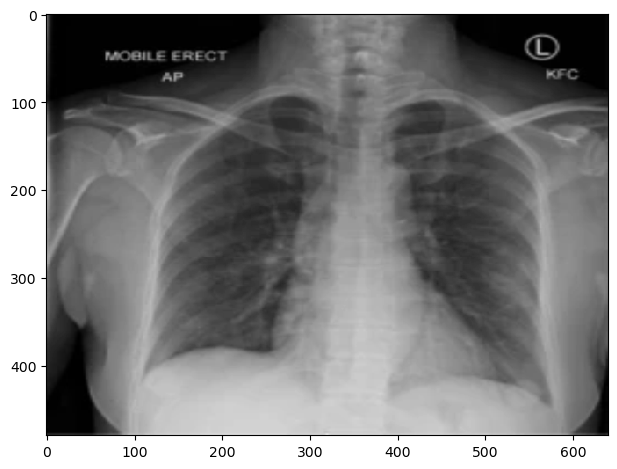

"img1 = cv2.imread('COVID-13.png', 0)\n\n\nplt.figure()\nplt.imshow(img1, cmap = plt.cm.gray)"

In [43]:
from skimage import io

# Charger et afficher une image
img1 = io.imread('COVID-13.png', as_gray=True)
io.imshow(img1, cmap=plt.cm.gray)
io.show()


'''img1 = cv2.imread('COVID-13.png', 0)


plt.figure()
plt.imshow(img1, cmap = plt.cm.gray)'''


In [44]:
def masc_gaus_1d(sigma, n):
    # Calcul de la largeur du noyau
    width = n // 2
    dx = 1
    # Création d'un vecteur 1D avec les valeurs x du noyau
    x = np.arange(-width, width)
    # Calcul du noyau 1D en utilisant la formule de la gaussienne
    kernel_1d = np.exp(-(x ** 2) / (2 * sigma ** 2))
    # Normalisation du noyau
    kernel_1d = kernel_1d / (math.sqrt(2 * np.pi) * sigma)
    
    return kernel_1d

def masc_gaus_2d(sigma, n):
    # Calcul de la largeur du noyau
    width = n // 2
    dx = 1
    dy = 1
    # Création de grilles 2D pour les valeurs x et y du noyau
    x = np.arange(-width, width)
    y = np.arange(-width, width)
    x2d, y2d = np.meshgrid(x, y)
    # Calcul du noyau 2D en utilisant la formule de la gaussienne
    kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
    # Normalisation du noyau
    kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2)
    
    return kernel_2d


C:\Users\yih\AppData\Local\Temp\ipykernel_18716\2133662020.py:1: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve, convolve1d
C:\Users\yih\AppData\Local\Temp\ipykernel_18716\2133662020.py:1: DeprecationWarning: Please import `convolve1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve, convolve1d


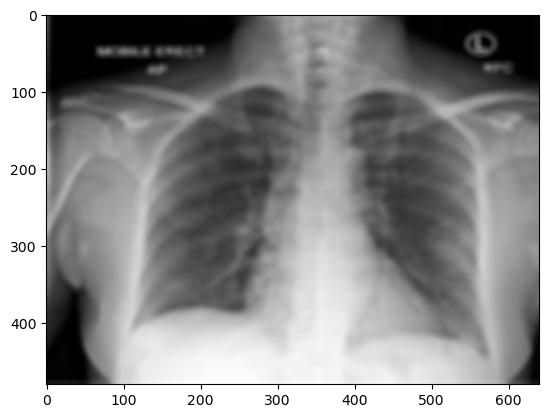

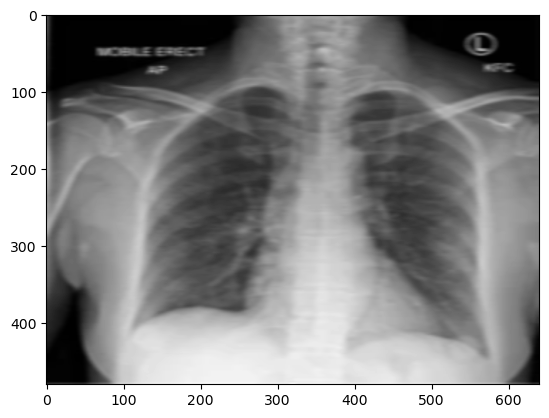

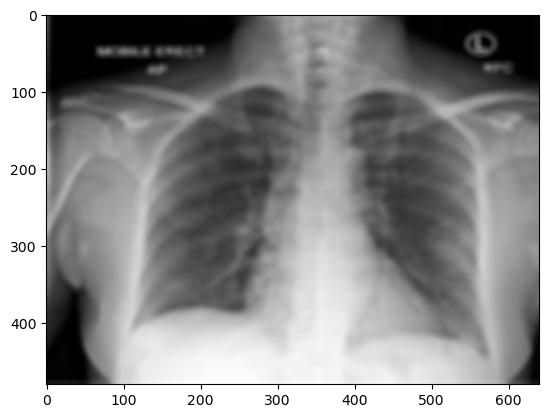

In [45]:
from scipy.ndimage.filters import convolve, convolve1d
from scipy.ndimage import convolve, convolve1d

sigma = 5
n = 11

# J'ai utilisé ces lignes de code pour la comparaison :
# filter_op = gaussian_filter(img1, 7)

# Calcul du noyau 1D de la gaussienne
kernel1D = masc_gaus_1d(sigma, n)

# Transformation du noyau 1D en noyau 2D
t2_kernel1D = kernel1D[:, None]
t_kernel1D = t2_kernel1D.T
k_kernel2D = t2_kernel1D * t_kernel1D

# Convolution de l'image avec le noyau 2D
img_convolved_1d1 = convolve(img1, k_kernel2D)
plt.figure()
plt.imshow(img_convolved_1d1, cmap = plt.cm.gray)

# Convolution de l'image avec le noyau 1D
img_convolved_1d = convolve1d(img1, kernel1D)
plt.figure()
plt.imshow(img_convolved_1d, cmap = plt.cm.gray)

# Calcul du noyau 2D de la gaussienne
kernel = masc_gaus_2d(sigma, n)

# Convolution de l'image avec le noyau 2D
img_convolved = convolve(img1, kernel)
plt.figure()
plt.imshow(img_convolved, cmap = plt.cm.gray)


In [46]:
def masc_deriv_gaus_1d(sigma, n, order):
    # Détermination de la largeur de la fenêtre du noyau
    width = n//2
    dx = 1
    x = np.arange(-width, width)
    # Calcul du noyau 1D de la dérivée de la gaussienne
    kernel_1d = x * np.exp(-(x ** 2) / (2 * sigma ** 2))
    # Normalisation du noyau
    kernel_1d = -kernel_1d / (math.sqrt(2 * np.pi) * sigma ** 3)
    
    return kernel_1d

def masc_deriv_gaus_2d(sigma, n, orientation):
    # Détermination de la largeur de la fenêtre du noyau
    width = n//2
    dx = 1
    dy = 1
    x = np.arange(-width, width)
    y = np.arange(-width, width)
    x2d, y2d = np.meshgrid(x, y)
    if orientation == 1:
        # Calcul du noyau 2D de la dérivée de la gaussienne selon l'orientation x
        kernel_2d = x2d * np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
    else:
        # Calcul du noyau 2D de la dérivée de la gaussienne selon l'orientation y
        kernel_2d = y2d * np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
    # Normalisation du noyau
    kernel_2d = -kernel_2d / (2 * np.pi * sigma ** 4)
    
    return kernel_2d


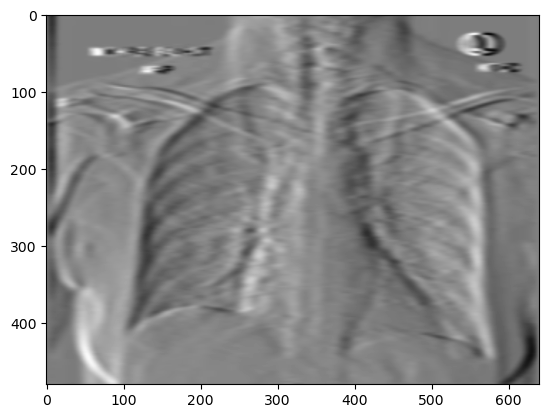

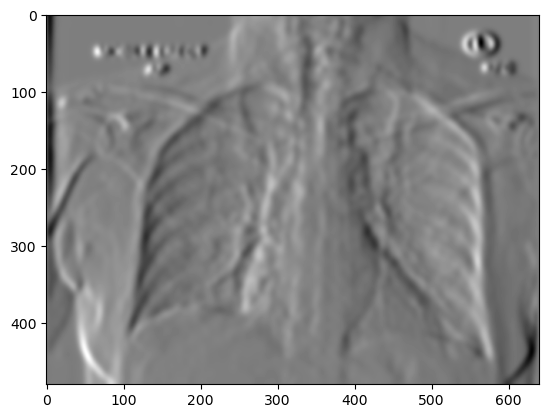

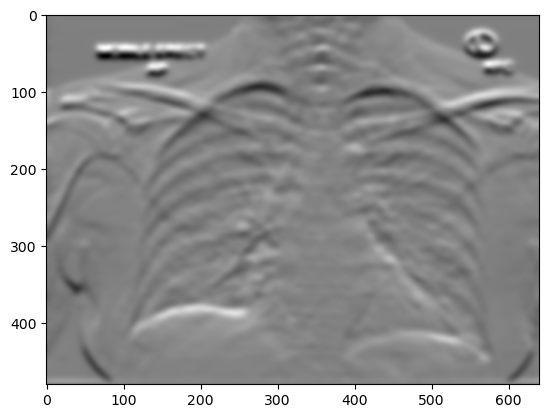

In [47]:
sigma = 7
n = 31
order = 1

# Orientation = 1 signifie la dérivée selon x. Orientation = 2 signifie la dérivée selon y.
orientation = 1

# Calcul de la dérivée de la gaussienne en 1D selon l'orientation spécifiée (x dans ce cas)
kernel1D_d = masc_deriv_gaus_1d(sigma, n, order)
img_convolved_1d = convolve1d(img1, kernel1D_d)
plt.figure()
plt.imshow(img_convolved_1d, cmap = plt.cm.gray)
# pp(kernel1D_d)

sigma = 4
n = 41

# X-derivate
# Calcul de la dérivée de la gaussienne en 2D selon l'orientation x
kernel2D_x = masc_deriv_gaus_2d(sigma, n, orientation)
img_convolved_d2_x = convolve(img1, kernel2D_x)
plt.figure()
plt.imshow(img_convolved_d2_x, cmap = plt.cm.gray)

# Y-derivate
# Réorientation pour calculer la dérivée de la gaussienne en 2D selon l'orientation y
orientation = 2
kernel2D_y = masc_deriv_gaus_2d(sigma, n, orientation)
img_convolved_d2_y = convolve(img1, kernel2D_y)
plt.figure()
plt.imshow(img_convolved_d2_y, cmap = plt.cm.gray)


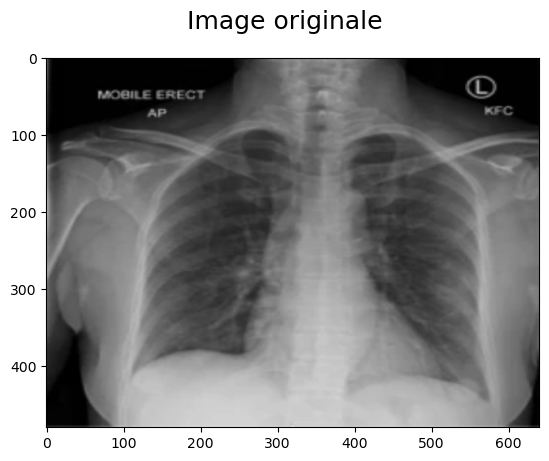

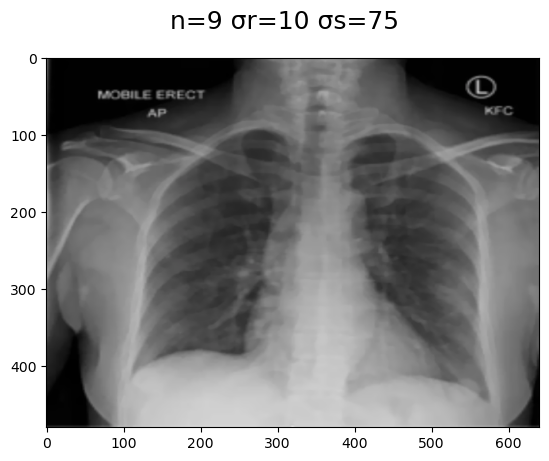

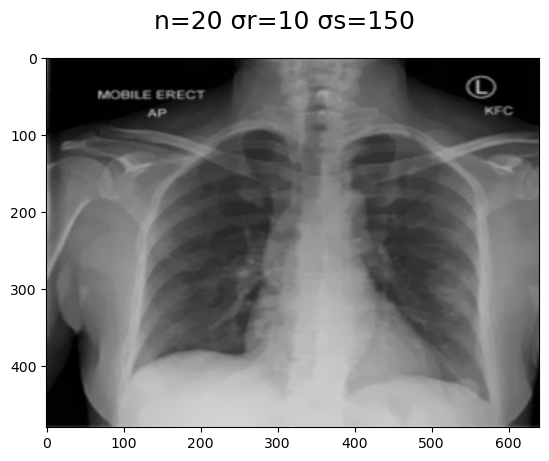

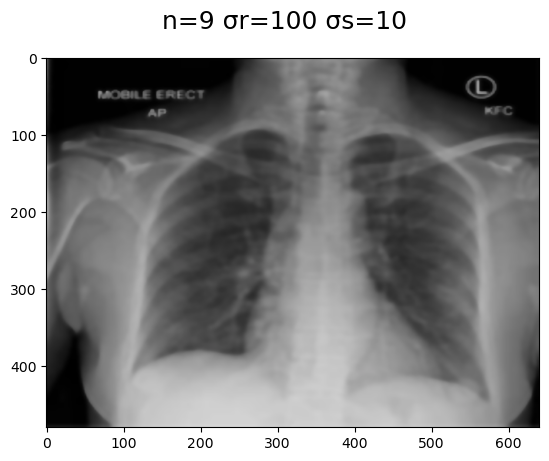

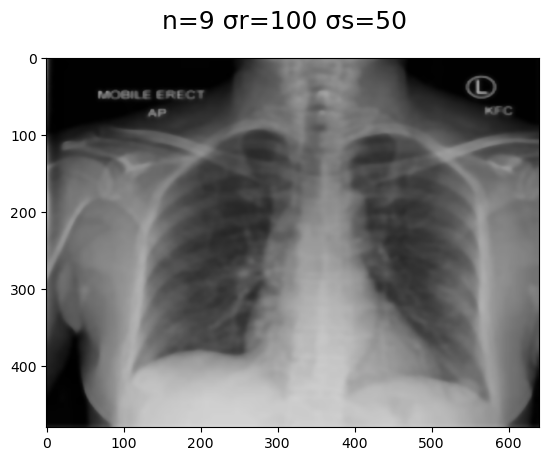

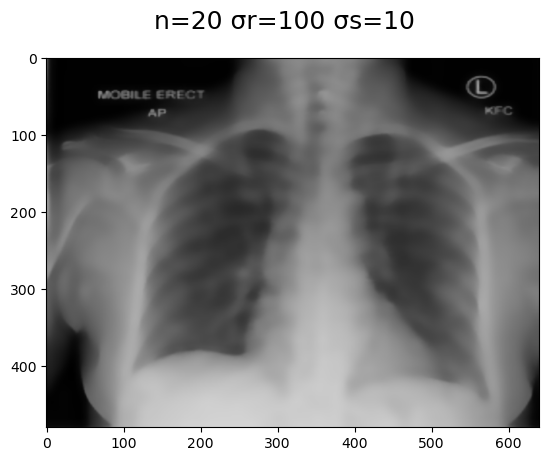

In [48]:
image = cv2.imread("COVID-13.png")

# Affichage de l'image originale
fig = plt.figure()
fig.suptitle('Image originale', fontsize=18)
plt.imshow(image)

# Application du filtre bilatéral avec n=9, σr=10 et σs=75
fig = plt.figure()
fig.suptitle('n=9 σr=10 σs=75', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,9,10,75))

# Application du filtre bilatéral avec n=20, σr=10 et σs=150
fig = plt.figure()
fig.suptitle('n=20 σr=10 σs=150', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,20,10,150))

# Application du filtre bilatéral avec n=9, σr=100 et σs=10
fig = plt.figure()
fig.suptitle('n=9 σr=100 σs=10', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,9,100,10))

# Application du filtre bilatéral avec n=9, σr=100 et σs=50
fig = plt.figure()
fig.suptitle('n=9 σr=100 σs=50', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,9,100,50))

# Application du filtre bilatéral avec n=20, σr=100 et σs=10
fig = plt.figure()
fig.suptitle('n=20 σr=100 σs=10', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,20,100,10))
